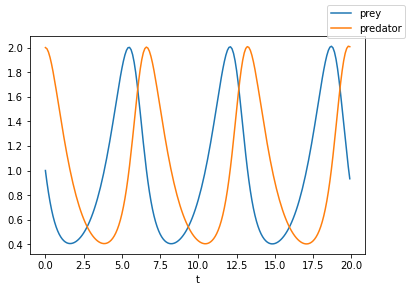

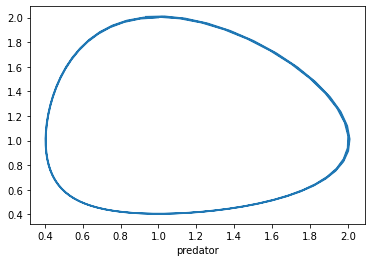

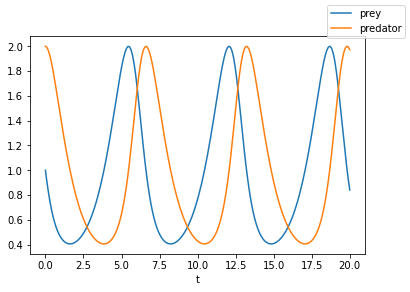

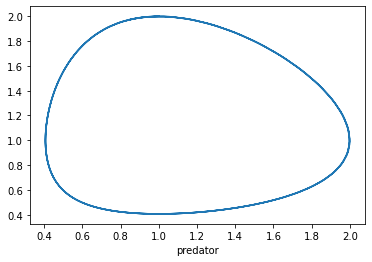

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lotka Volterra

def myLV(x,t,param):
	'''Function that implements the Lotka-Volterra system.
	The first input is the population composition [prey, predator]
	The second input is the time, which must be included to make it work with odeint. Note that it is not used.
	The third input is a vector with the parameters for the LV system: [prey_growth_rate, predation_rate, predator_growth_rate, predator_death_rate] '''
	dxdt1 = param[0]*x[0] - param[1]*x[0]*x[1]
	dxdt2 = param[2]*x[0]*x[1] - param[3]*x[1]
	return np.asarray([dxdt1,dxdt2])


##################
# Euler's method
##################

# Settings
dt = 0.001  			# Integration time step. It is important to keep this low for an accurate integration.
y0 = np.asarray([1,2])  	# Starting composition
param = np.asarray([1,1,1,1])  	# Vector with the parameters of LV
tspan = np.asarray([0,20])	# Start and end times
Dt_to_store = 0.1		# Time interval for storing data points. We do not want to store each dt step because that would generate an unnecessarily large amount of data. That's why we define this second interval.

# Preparing accessory variables, storage, etc.
nsteps = int((tspan[1]-tspan[0])/dt)		# Number of integration time steps (iterations)
Dt_dt_ratio = int(Dt_to_store/dt) 		# Number of iterations between two stored data points
t = np.zeros(int(nsteps/Dt_dt_ratio)+1) 	# We will store times here
y =np.zeros([int(nsteps/Dt_dt_ratio)+1,2]) 	# We will store population sizes here
y[0,] = y0 					# Store initial condition
ytmp = y0  					# ytmp will be the value that will be updated in each iteration
ct = 1  					# Counter to keep track of where we are in the storage arrays

# Carry out numerical integration with Euler's method
for ix in range(nsteps-1):
	dydt = myLV(ytmp,[],param) 	# Calculate the derivative. Note that we pass an empty vector [] for time: this input is mandatory but its value is irrelevant (it is not really used by myLV). 
	dy = dydt * dt
	ytmp = ytmp + dy	   	# Update ytmp
	if (ix%Dt_dt_ratio == 0):	# Store results every "Dt_dt_ratio" iterations
		y[ct,] = ytmp
		t[ct] = tspan[0]+ix*dt
		ct = ct+1

# Plot results vs time
fig = plt.figure()
l1 = plt.plot(t, y)
fig.legend(l1, ('prey', 'predator'), 'upper right')
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y[:,0], y[:,1])
plt.xlabel('prey')
plt.xlabel('predator')
plt.show()

# What would happen if we choose a dt that is too large? Try setting dt = 0.1 and check!!!


#################
# Scipy ODEint
#################

# Here we use the built-in odeint function which comes with scipy.integrate. This function implements more sophisticated numerical integration methods, so we do not have to worry about determining a "good" dt.

# The input to odeint is: (1) the function with the ODE system (which must itself have y and t as first and second inputs); (2) the starting composition y0; (3) the vector of times for which we want to get results; (4) optionally, additional arguments for the ODE system function (in our case, the parameters of the LV model). Note that the additional arguments must be given as a tuple: if there is only one additional parameter, as here, we still need to rite it in parentheses and followed by a comma.

# Settings
y0 = np.asarray([1,2])  	# Starting composition
param = np.asarray([1,1,1,1])  	# Vector with the parameters of LV
tspan = np.asarray([0,20])	# Start and end times
Dt = 0.1			# Time interval to record results. Note that this is NOT the integration time step (which is automatically determined bu odeint).

# Prepare accessory variables
nsteps = int((tspan[1]-tspan[0])/Dt)
t2 = np.linspace(tspan[0],tspan[1],nsteps)

# Run odeint
y2 = odeint(myLV, y0, t2, args=(param,))

# Plot results vs time
fig = plt.figure()
l2 = plt.plot(t2, y2)
fig.legend(l2, ('prey', 'predator'), 'upper right')
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y2[:,0], y2[:,1])
plt.xlabel('prey')
plt.xlabel('predator')
plt.show()



In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lotka Volterra

def mySIR(x,t,param):
    
    dxdt1 = -(param[0]*x[0]*x[1])
    dxdt2 = param[0]*x[0]*x[1] - param[1]*x[1]
    dxdt3 = param[1]*x[1]
    
    return np.asarray([dxdt1,dxdt2,dxdt3])

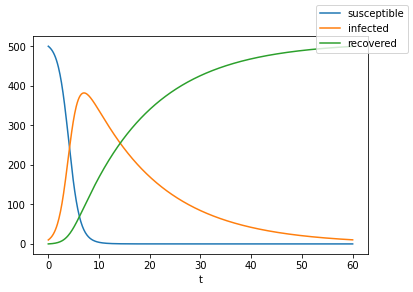

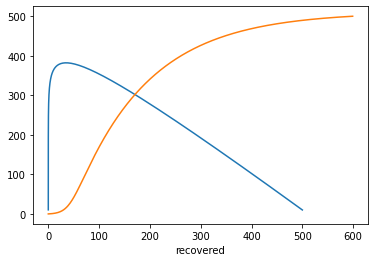

In [ ]:
# Here we use the built-in odeint function which comes with scipy.integrate. This function implements more sophisticated numerical integration methods, so we do not have to worry about determining a "good" dt.

# The input to odeint is: (1) the function with the ODE system (which must itself have y and t as first and second inputs); (2) the starting composition y0; (3) the vector of times for which we want to get results; (4) optionally, additional arguments for the ODE system function (in our case, the parameters of the LV model). Note that the additional arguments must be given as a tuple: if there is only one additional parameter, as here, we still need to rite it in parentheses and followed by a comma.

# Settings
y0 = np.asarray([500,10,0])  	# Starting composition
param = np.asarray([0.002,0.07])  	# Vector with the parameters of LV
tspan = np.asarray([0,60])	# Start and end times
Dt = 0.1			# Time interval to record results. Note that this is NOT the integration time step (which is automatically determined bu odeint).

# Prepare accessory variables
nsteps = int((tspan[1]-tspan[0])/Dt)
t2 = np.linspace(tspan[0],tspan[1],nsteps)

# Run odeint
y2 = odeint(mySIR, y0, t2, args=(param,))

# Plot results vs time
fig = plt.figure()
l2 = plt.plot(t2, y2)
fig.legend(l2, ('susceptible', 'infected', 'recovered'), 'upper right')
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y2[:,0], y2[:,1], y2[:,2])
plt.xlabel('susceptible')
plt.xlabel('infected')
plt.xlabel('recovered')
plt.show()


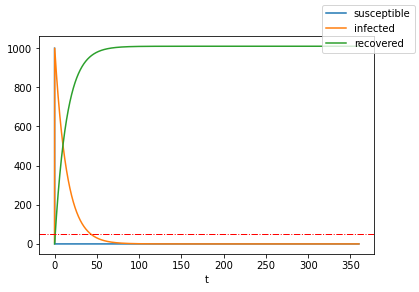

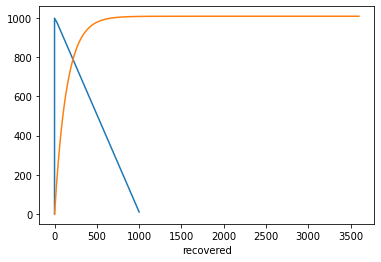

In [ ]:
y0 = np.asarray([1000,10,0])  	# Starting composition
param = np.asarray([0.08,0.07])  	# Vector with the parameters of LV
tspan = np.asarray([0,360])	# Start and end times
Dt = 0.1			# Time interval to record results. Note that this is NOT the integration time step (which is automatically determined bu odeint).

# Prepare accessory variables
nsteps = int((tspan[1]-tspan[0])/Dt)
t2 = np.linspace(tspan[0],tspan[1],nsteps)

# Run odeint
y2 = odeint(mySIR, y0, t2, args=(param,))

# Plot results vs time
fig = plt.figure()
l2 = plt.plot(t2, y2)
fig.legend(l2, ('susceptible', 'infected', 'recovered'), 'upper right')
plt.axhline(y=50, xmin=0, xmax=360, color='r', linestyle='-.', linewidth=1)
#plt.axvline(x = 14, ymin=0, ymax=500, color='r', linestyle='--', linewidth=1)
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y2[:,0], y2[:,1], y2[:,2])
plt.xlabel('susceptible')
plt.xlabel('infected')
plt.xlabel('recovered')
plt.show()

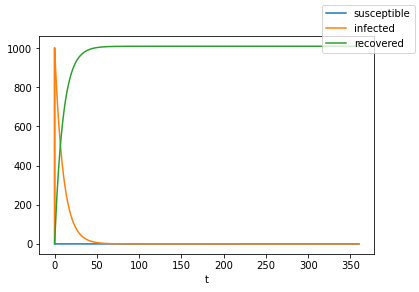

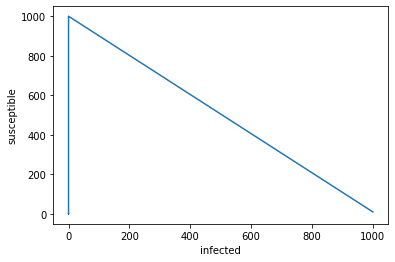

In [ ]:
#searching for endemic states
y0 = np.asarray([1000,10,0])  	# Starting composition
param = np.asarray([0.5,0.1])  	# Vector with the parameters of LV
tspan = np.asarray([0,360])	# Start and end times
Dt = 0.1			# Time interval to record results. Note that this is NOT the integration time step (which is automatically determined bu odeint).

# Prepare accessory variables
nsteps = int((tspan[1]-tspan[0])/Dt)
t2 = np.linspace(tspan[0],tspan[1],nsteps)

# Run odeint
y2 = odeint(mySIR, y0, t2, args=(param,))

# Plot results vs time
fig = plt.figure()
l2 = plt.plot(t2, y2)
fig.legend(l2, ('susceptible', 'infected', 'recovered'), 'upper right')
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y2[:,0], y2[:,1])
plt.ylabel('susceptible')
plt.xlabel('infected')
plt.show()

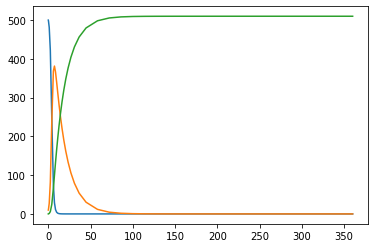

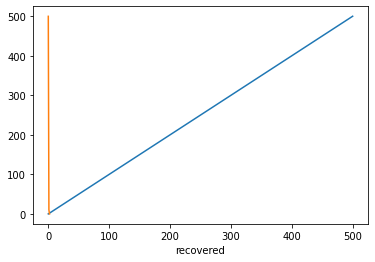

In [ ]:
#otra forma de hacerlo
from scipy.integrate import solve_ivp
def rhs(t, x): 
    param = [0.002,0.07]
    return [-(param[0]*x[0]*x[1]), param[0]*x[0]*x[1] - param[1]*x[1], param[1]*x[1]]
res = solve_ivp(rhs, (0, 360), [500, 10, 0])

plt.plot(res.t, res.y.T)


fig = plt.figure()
l2 = plt.plot(res.y[:,0], res.y[:,1], res.y[:,2])
plt.xlabel('susceptible')
plt.xlabel('infected')
plt.xlabel('recovered')
plt.show()